In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack
from gensim import parsing

In [2]:
#Instantiate and setup DataFrame
df = pd.read_csv('..\\data\\X.csv')
df.set_index('LISTING_ID', inplace = True, drop = True)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9
LISTING_ID,,,,,,,,,,
7075306172,0.917307,0.618685,0.192444,0.099921,0.206868,1.907992,-0.589809,0.425400,0.937936,-0.663455
7075321793,2.725348,0.182099,0.599635,-0.153622,0.743383,1.879798,-0.662512,0.086399,1.158547,-0.440024
7075372720,2.359884,0.124991,0.296978,0.079791,0.647150,1.813236,-0.542062,0.057395,1.010028,-0.771719
7075376264,2.359883,0.124993,0.296990,0.079790,0.647147,1.813213,-0.542055,0.057393,1.010026,-0.771720
7075380613,2.289303,0.146787,0.165366,0.345773,0.798692,1.715030,-0.397729,0.132051,1.198907,-0.484457


#### K-Means

In [ ]:
#Determine number of clusters

In [5]:
inertia_list = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters = k, random_state = 33)
    km.fit(df)
    inertia_list.append(km.inertia_)

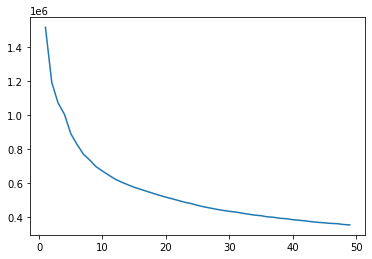

In [6]:
plt.plot(K, inertia_list)

In [117]:
#### Include Average Silhouette Method and Gap Statistic

In [7]:
km = KMeans(n_clusters = 15, random_state = 33)
km_df = pd.DataFrame(km.fit_transform(df))
km_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.648924,4.241990,3.048205,4.430072,24.858670,2.682690,3.339635,2.169100,3.439565,4.742870,3.766068,4.052204,3.565595,3.814753,3.710023
1,4.803323,5.432603,4.503983,5.700085,24.243139,2.591405,3.685421,2.603076,4.777662,3.269062,5.030195,5.466734,4.397108,3.384919,5.012131
2,4.434176,4.923839,4.111875,5.337337,24.268373,2.403505,3.454656,2.324600,4.411300,3.403873,4.797078,5.231067,4.123636,3.327554,4.642719
3,4.434163,4.923835,4.111864,5.337324,24.268373,2.403496,3.454640,2.324578,4.411296,3.403862,4.797065,5.231057,4.123622,3.327533,4.642710
4,4.327786,4.656972,4.055340,5.284371,24.232665,2.435472,3.410037,2.302780,4.378982,3.497437,4.655062,5.300181,4.000247,3.316533,4.591490


In [10]:
km_df.set_index(df.index, inplace = True)
km_df['Cluster'] = km.labels_
km_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Cluster
LISTING_ID,,,,,,,,,,,,,,,,
7075306172,3.648924,4.241990,3.048205,4.430072,24.858670,2.682690,3.339635,2.169100,3.439565,4.742870,3.766068,4.052204,3.565595,3.814753,3.710023,7
7075321793,4.803323,5.432603,4.503983,5.700085,24.243139,2.591405,3.685421,2.603076,4.777662,3.269062,5.030195,5.466734,4.397108,3.384919,5.012131,5
7075372720,4.434176,4.923839,4.111875,5.337337,24.268373,2.403505,3.454656,2.324600,4.411300,3.403873,4.797078,5.231067,4.123636,3.327554,4.642719,7
7075376264,4.434163,4.923835,4.111864,5.337324,24.268373,2.403496,3.454640,2.324578,4.411296,3.403862,4.797065,5.231057,4.123622,3.327533,4.642710,7
7075380613,4.327786,4.656972,4.055340,5.284371,24.232665,2.435472,3.410037,2.302780,4.378982,3.497437,4.655062,5.300181,4.000247,3.316533,4.591490,7


<BarContainer object of 15 artists>

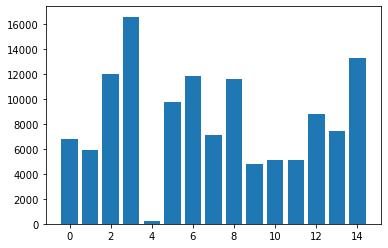

In [11]:
plt.bar(km_df.Cluster.value_counts().index, km_df.Cluster.value_counts())

#### DBSCAN

In [33]:
db = DBSCAN(eps=0.7, min_samples=100)
db.fit(X)

DBSCAN(eps=0.7, min_samples=100)

<BarContainer object of 5 artists>

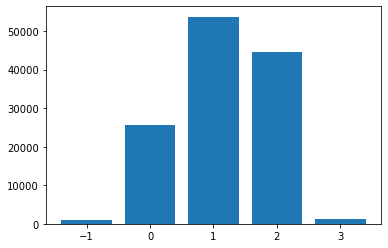

In [34]:
db_label_counts = pd.Series(db.labels_).value_counts().sort_index()
plt.bar(db_label_counts.index, db_label_counts)